# Compare canopy structure before and after treatments on Cle Elum Ridge   
### Notebook contents 
* Opening the netcdfs created in the *rapid_model_create_netcdf.ipynb* notebook 
* comparing the canopy height models from the different datasets to see change in forest structure 
* also, taking a look at the difference between my method dce and Giulia's 

created by Cassie Lumbrazo\
date: October 2023\
python environment: **raster**

In [7]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import rioxarray
import rasterio
# import rasterstats
import scipy

In [8]:
# The two netcdfs created in the previous notebook, one has some correction for negative snow depth values and the other has the snow depth values cut at zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_cutatzero.nc') # for the snow depth values cut a zero
ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_negtozero.nc') # for the snow depth values negative to zeros
# ds.close() # how to close a dataset 

In [9]:
ds

<xarray.Dataset>
Dimensions:                   (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                         (x) float64 4.65e+05 4.65e+05 ... 4.676e+05
  * y                         (y) float64 2.111e+05 2.111e+05 ... 2.097e+05
  * band                      (band) int32 1
    spatial_ref               int32 ...
Data variables: (12/36)
    hs_rapid_set1             (band, y, x) float32 ...
    hs_rapid_set2             (band, y, x) float32 ...
    hs_rapid_set3             (band, y, x) float32 ...
    hs_rapid_set2_maskpiles   (band, y, x) float32 ...
    hs_rapid_set3_maskpiles   (band, y, x) float32 ...
    chmws_rapid               (band, y, x) float32 ...
    ...                        ...
    dah_reclass               (band, y, x) float32 ...
    dce_rapid_reclass         (band, y, x) float32 ...
    giulia_dce_rapid_reclass  (band, y, x) float64 ...
    dce_ncalm_reclass         (band, y, x) float32 ...
    hs_rapid                  (band, y, x) float32 ...
    chmas_rapid               (band, y, x) float32 ...

# Plot all three canopy height models together 
* snow off chm 
* ncalm chmws 
* rapid chmws 

In [10]:
ds

<xarray.Dataset>
Dimensions:                   (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                         (x) float64 4.65e+05 4.65e+05 ... 4.676e+05
  * y                         (y) float64 2.111e+05 2.111e+05 ... 2.097e+05
  * band                      (band) int32 1
    spatial_ref               int32 ...
Data variables: (12/36)
    hs_rapid_set1             (band, y, x) float32 ...
    hs_rapid_set2             (band, y, x) float32 ...
    hs_rapid_set3             (band, y, x) float32 ...
    hs_rapid_set2_maskpiles   (band, y, x) float32 ...
    hs_rapid_set3_maskpiles   (band, y, x) float32 ...
    chmws_rapid               (band, y, x) float32 ...
    ...                        ...
    dah_reclass               (band, y, x) float32 ...
    dce_rapid_reclass         (band, y, x) float32 ...
    giulia_dce_rapid_reclass  (band, y, x) float64 ...
    dce_ncalm_reclass         (band, y, x) float32 ...
    hs_rapid                  (band, y, x) float32 ...
    chmas_rapid               (band, y, x) float32 ...

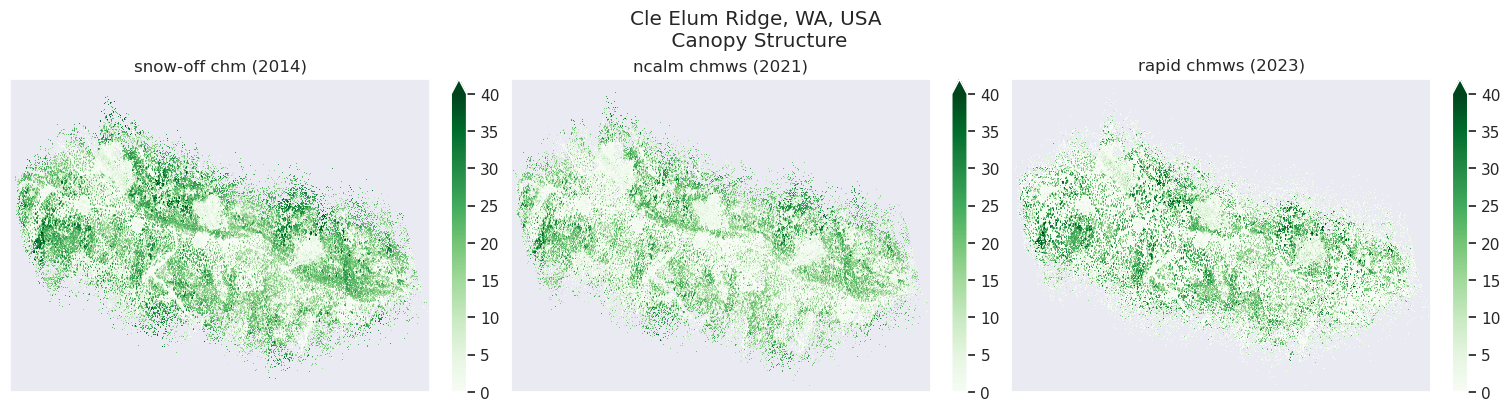

In [11]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Canopy Structure')

ds.chm_snowoff.plot(ax=axes[0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
ds.chmws_ncalm.plot(ax=axes[1], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
ds.chmws_rapid.plot(ax=axes[2], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 

axes[0].set_title('snow-off chm (2014)')
axes[1].set_title('ncalm chmws (2021)')
axes[2].set_title('rapid chmws (2023)')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

Calculate the difference from rapid to ncalm, and from rapid to snowoff

In [12]:
ds['diff_chm_rapid_snowoff'] = ds['chmws_rapid'] - ds['chm_snowoff']
ds['diff_chm_ncalm_snowoff'] = ds['chmws_ncalm'] - ds['chm_snowoff']
ds['diff_chm_rapid_ncalm'] =   ds['chmws_rapid'] - ds['chmws_ncalm']

ds['diff_chm_snowoff_rapid'] =  ds['chm_snowoff']- ds['chmws_rapid']
ds['diff_chm_snowoff_ncalm'] =  ds['chm_snowoff']- ds['chmws_ncalm']
ds['diff_chm_ncalm_rapid'] =    ds['chmws_ncalm']- ds['chmws_rapid'] 

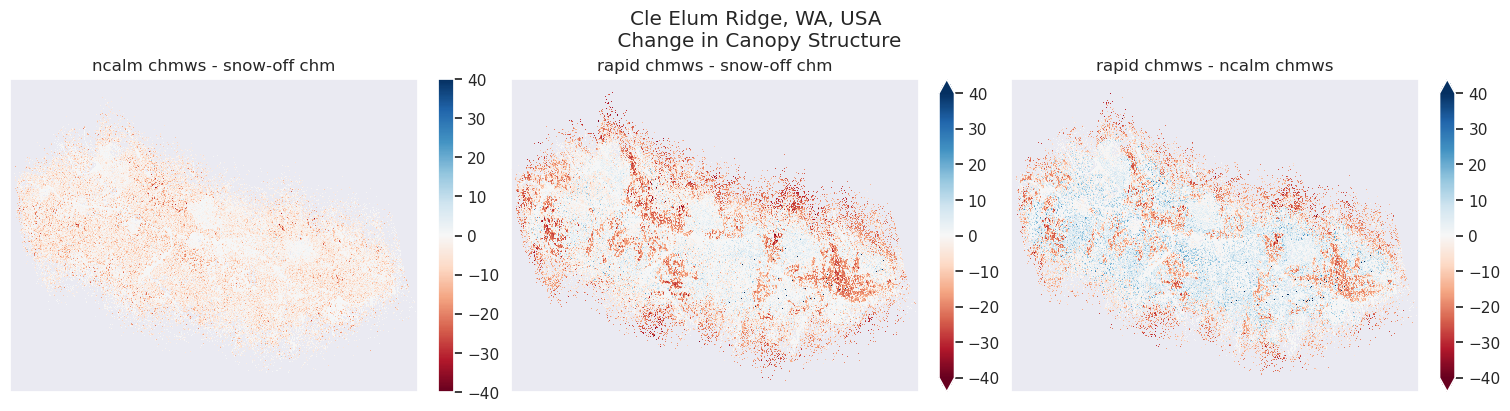

In [13]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Change in Canopy Structure')

ds.diff_chm_ncalm_snowoff.plot(ax=axes[0], cmap='RdBu', vmin=-40, vmax=40, cbar_kwargs={'label':''}) 
ds.diff_chm_rapid_snowoff.plot(ax=axes[1], cmap='RdBu', vmin=-40, vmax=40, cbar_kwargs={'label':''}) 
ds.diff_chm_rapid_ncalm.plot(ax=axes[2], cmap='RdBu', vmin=-40, vmax=40, cbar_kwargs={'label':''}) 

axes[0].set_title('ncalm chmws - snow-off chm')
axes[1].set_title('rapid chmws - snow-off chm')
axes[2].set_title('rapid chmws - ncalm chmws')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

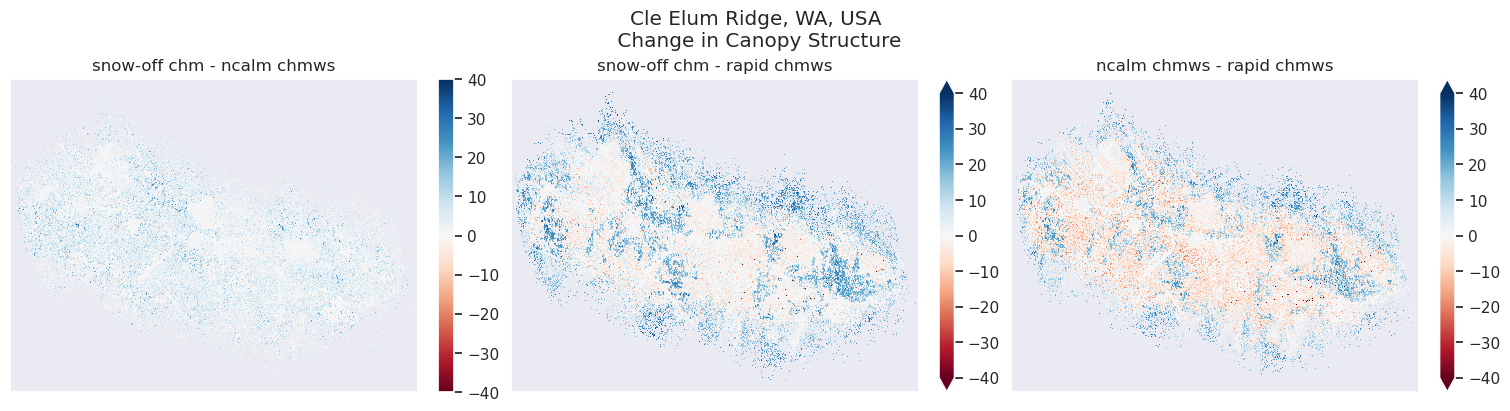

In [14]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Change in Canopy Structure')

ds.diff_chm_snowoff_ncalm.plot(ax=axes[0], cmap='RdBu', vmin=-40, vmax=40, cbar_kwargs={'label':''}) 
ds.diff_chm_snowoff_rapid.plot(ax=axes[1], cmap='RdBu', vmin=-40, vmax=40, cbar_kwargs={'label':''}) 
ds.diff_chm_ncalm_rapid.plot(ax=axes[2], cmap='RdBu', vmin=-40, vmax=40, cbar_kwargs={'label':''}) 

axes[0].set_title('snow-off chm - ncalm chmws')
axes[1].set_title('snow-off chm - rapid chmws')
axes[2].set_title('ncalm chmws - rapid chmws')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

So, now if we wanted to determiene what regions the lidar suggests, 
(a) did not change from treatments 
(b) did change from treatments 

We would want to consider a few things.
* We would not want to consider small values, such as <5 meters change, to account for scrubs growing, trees growing, ground changing a little, or piles of logs on the ground from logging 
* We would want to consider the large changes (i.e, a 30 meter tree being removed)
* We will want to add a buffer on the datasets to remove edge effects for sure 

To do the buffer, we want to buffer the rapid chm, then clip the other two chm to the rapid model

In [15]:
# first creating a binary mask
# if there are values then 1, if not then 0 
chm_mask = ds['chmws_rapid'].copy(deep=True) # first cope chmws
chm_mask = chm_mask.fillna(-1000) # then filling the nans in the mask with 500 to make this easier
chm_mask = chm_mask.where(chm_mask < -50, 1) # where condition is FALSE, fill with 1 
chm_mask = chm_mask.where(chm_mask > -50, 0) # where condition is FALSE, fill with 0 

# now, we take the dce_mask and do the erosion thing with it to create the fixed mask 
fixed_mask = scipy.ndimage.binary_erosion(chm_mask, structure=np.ones((1,10,10))).astype(chm_mask.dtype) # had to add the 1 to the 50x50 for dimensions

# For the chmws mask, we do not accoutn for large edge effects, so a buffer of 5-10 meters should work. Let's do 10. 

# add the fixed mask to the dataset 
ds['chm_mask'] = xr.DataArray(fixed_mask,dims = ['band','y','x'])

# Now, go mask my OG dataset by the fixed_mask to remove the edges of dce 
ds['chmws_rapid_raw'] = ds['chmws_rapid'].copy(deep=True) # saving dce into a variable for the dataset 
ds['chmws_rapid'] = ds['chmws_rapid'].where(ds['chm_mask'] >= 1) # resaving the mask dce into dce variable 

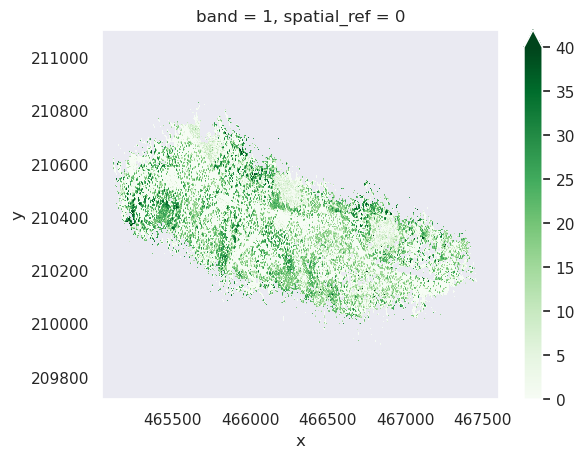

In [16]:
ds.chmws_rapid.plot(cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''})

In [17]:
ds['diff_chm_rapid_snowoff'] = ds['chmws_rapid'] - ds['chm_snowoff']
ds['diff_chm_ncalm_snowoff'] = ds['chmws_ncalm'] - ds['chm_snowoff']
ds['diff_chm_rapid_ncalm'] =   ds['chmws_rapid'] - ds['chmws_ncalm']

ds['diff_chm_snowoff_rapid'] =  ds['chm_snowoff']- ds['chmws_rapid']
ds['diff_chm_snowoff_ncalm'] =  ds['chm_snowoff']- ds['chmws_ncalm']
ds['diff_chm_ncalm_rapid'] =    ds['chmws_ncalm']- ds['chmws_rapid'] 

That looks a lot better, now check out how the differencing looks. 

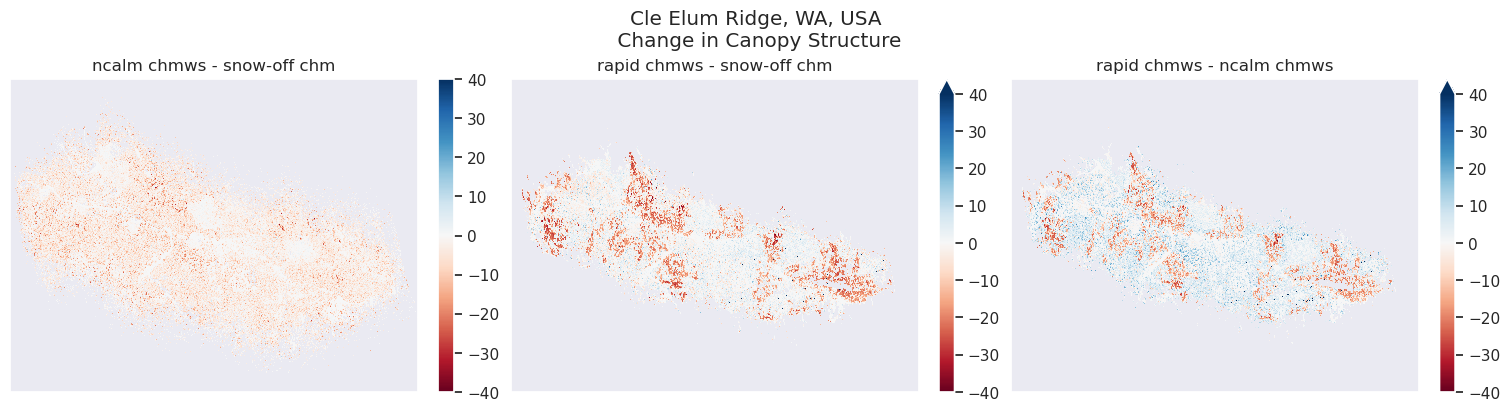

In [18]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Change in Canopy Structure')

ds.diff_chm_ncalm_snowoff.plot(ax=axes[0], cmap='RdBu', vmin=-40, vmax=40, cbar_kwargs={'label':''}) 
ds.diff_chm_rapid_snowoff.plot(ax=axes[1], cmap='RdBu', vmin=-40, vmax=40, cbar_kwargs={'label':''}) 
ds.diff_chm_rapid_ncalm.plot(ax=axes[2], cmap='RdBu', vmin=-40, vmax=40, cbar_kwargs={'label':''}) 

axes[0].set_title('ncalm chmws - snow-off chm')
axes[1].set_title('rapid chmws - snow-off chm')
axes[2].set_title('rapid chmws - ncalm chmws')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

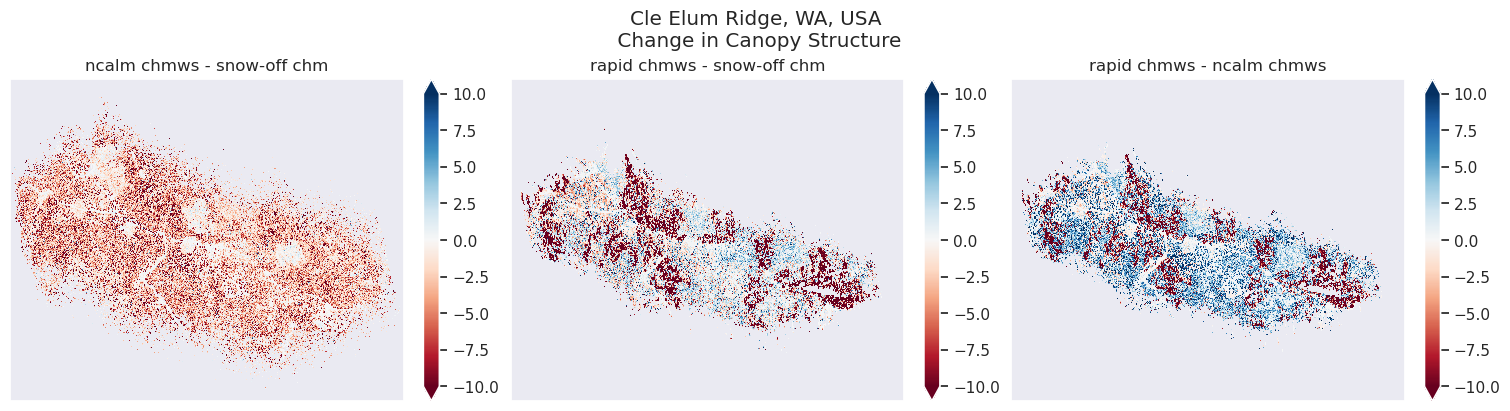

In [19]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Change in Canopy Structure')

ds.diff_chm_ncalm_snowoff.plot(ax=axes[0], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 
ds.diff_chm_rapid_snowoff.plot(ax=axes[1], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 
ds.diff_chm_rapid_ncalm.plot(ax=axes[2], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 

axes[0].set_title('ncalm chmws - snow-off chm')
axes[1].set_title('rapid chmws - snow-off chm')
axes[2].set_title('rapid chmws - ncalm chmws')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

The change in canopy structure between rapid and snow off looks cleaner, but we are interested in the snow situation differences between ncalm and rapid. Perhaps for now, we do the calculations for both. 

So, for this difference map, the locations that are negative are there trees have been removed between snow off and rapid.

In [20]:
ds['canopychange'] = ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] < 0) # removed trees
ds['nocanopychange'] = ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] >= 0) # stayed the same 

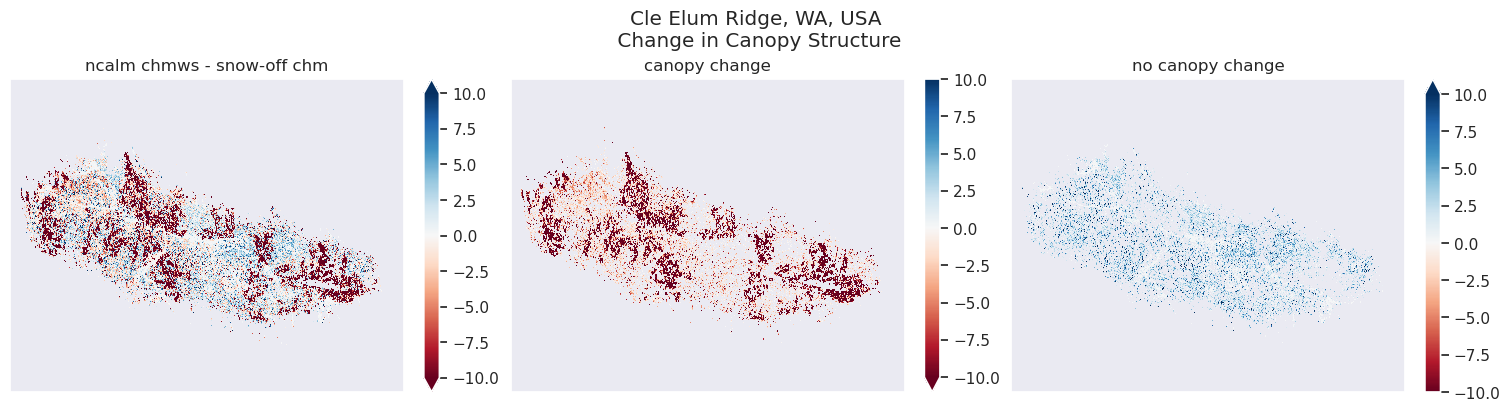

In [21]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Change in Canopy Structure')

ds.diff_chm_rapid_snowoff.plot(ax=axes[0], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 
ds.canopychange.plot(ax=axes[1], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 
ds.nocanopychange.plot(ax=axes[2], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 

axes[0].set_title('ncalm chmws - snow-off chm')
axes[1].set_title('canopy change')
axes[2].set_title('no canopy change')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

However, we do not want to consider trees being removed if there is a change of 2 meters or so. 
Let's take a look at the histogram of the difference to see how much it is. 

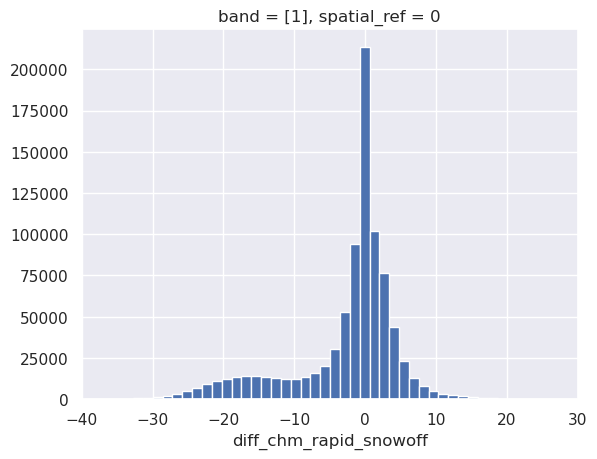

In [22]:
ds['diff_chm_rapid_snowoff'].plot.hist(bins=100, alpha=0.5)
# ds['diff_chm_rapid_ncalm'].plot.hist(bins=100, alpha=0.5)
# ds['diff_chm_ncalm_snowoff'].plot.hist(bins=100, alpha=0.5)
plt.xlim(-40,30)
plt.legend(['rapid-snowoff','rapid-ncalm','ncalm-snowoff'])
plt.show()

Okay, this makes sense. We are subtracting rapid from snow off, so
* small positive values means things grew (i.e, shrubs or trees grew over ~10 years)
* large negative values are trees being removed 
* small negative values mean scrubs and such were also removed. 
We really want to capture the larger trees (~8-10 meters to 30 meters in height that are removed)

In [23]:
ds['canopychange'] = ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] < -3) # removed trees, maybe at -2 meters instead
ds['nocanopychange'] = ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] >= 0) # stayed the same 

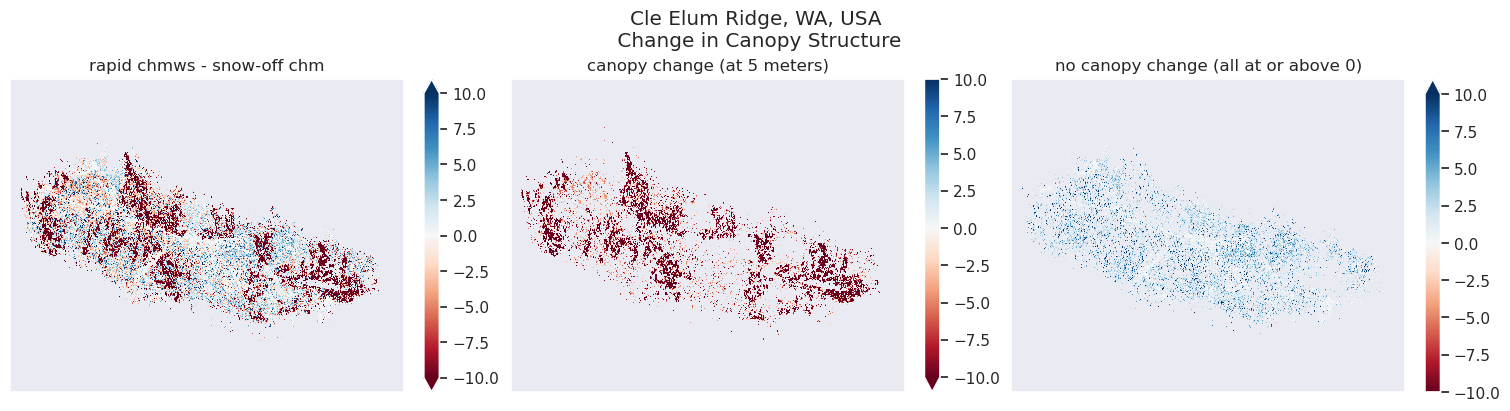

In [24]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Change in Canopy Structure')

ds.diff_chm_rapid_snowoff.plot(ax=axes[0], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 
ds.canopychange.plot(ax=axes[1], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 
ds.nocanopychange.plot(ax=axes[2], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 

axes[0].set_title('rapid chmws - snow-off chm')
axes[1].set_title('canopy change (at 5 meters)')
axes[2].set_title('no canopy change (all at or above 0)')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

Lets compare what threshold we want for canopy change in meters

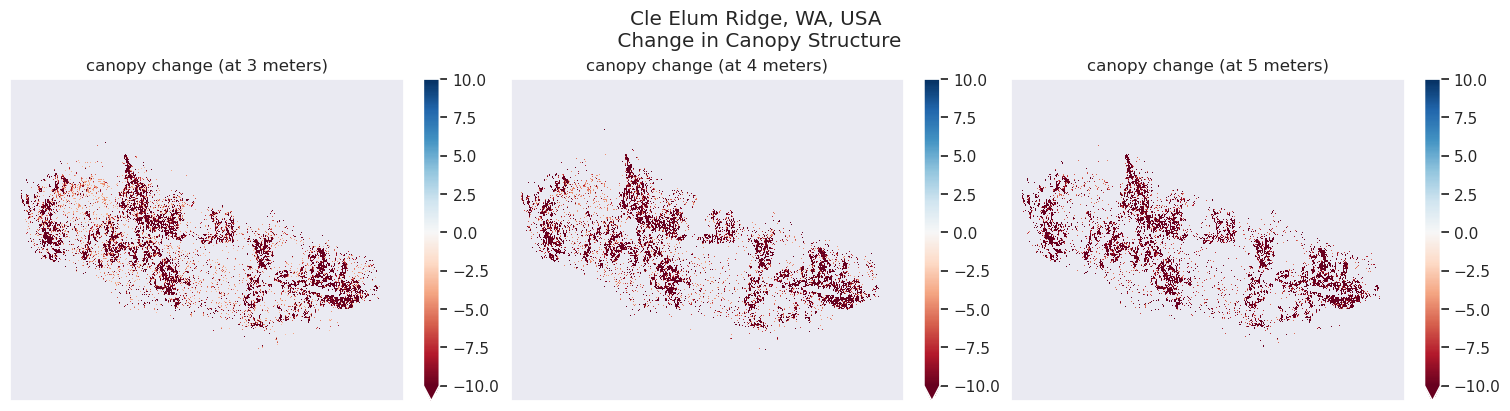

In [25]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Change in Canopy Structure')

(ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] < -3)).plot(ax=axes[0], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 
(ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] < -4)).plot(ax=axes[1], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 
(ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] < -5)).plot(ax=axes[2], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 

axes[0].set_title('canopy change (at 3 meters)')
axes[1].set_title('canopy change (at 4 meters)')
axes[2].set_title('canopy change (at 5 meters)')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

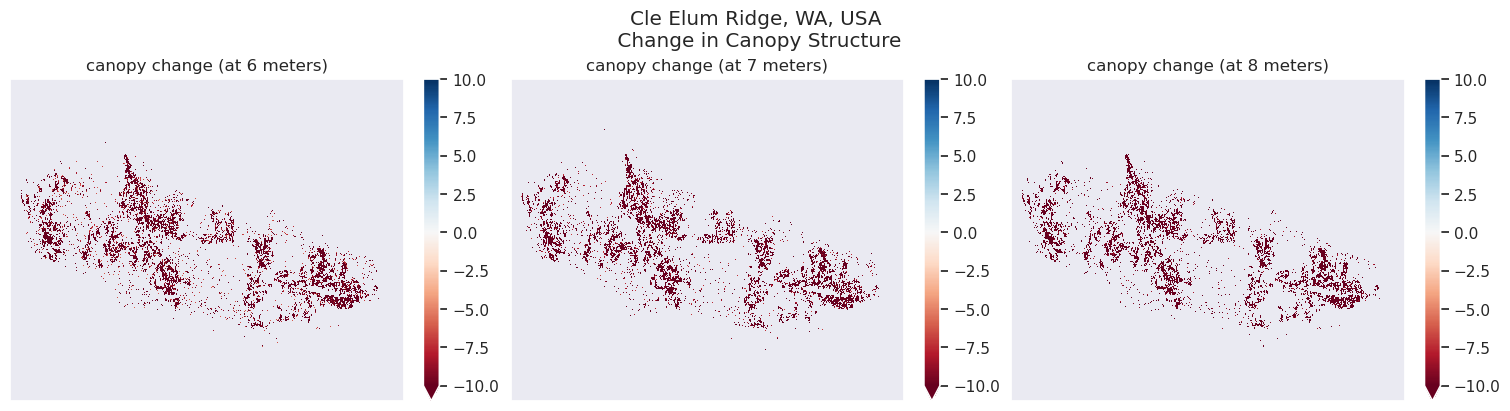

In [26]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Change in Canopy Structure')

(ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] < -6)).plot(ax=axes[0], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 
(ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] < -7)).plot(ax=axes[1], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 
(ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] < -8)).plot(ax=axes[2], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 

axes[0].set_title('canopy change (at 6 meters)')
axes[1].set_title('canopy change (at 7 meters)')
axes[2].set_title('canopy change (at 8 meters)')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

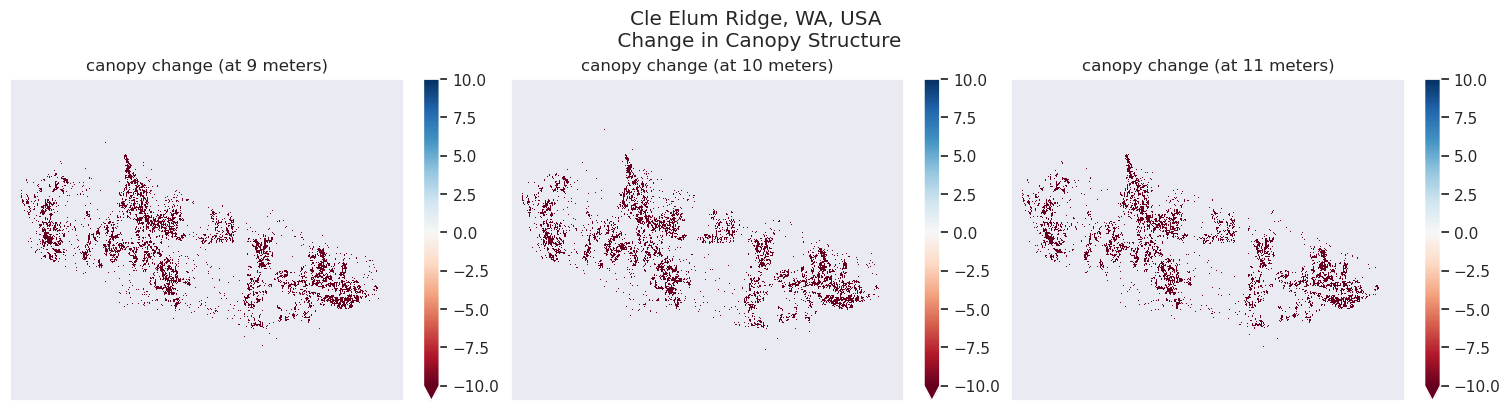

In [27]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Change in Canopy Structure')

(ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] < -9)).plot(ax=axes[0], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 
(ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] < -10)).plot(ax=axes[1], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 
(ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] < -11)).plot(ax=axes[2], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''}) 

axes[0].set_title('canopy change (at 9 meters)')
axes[1].set_title('canopy change (at 10 meters)')
axes[2].set_title('canopy change (at 11 meters)')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

For now, let's proceed with simply 10 meters to get the rest of the code written then come back to determine the final threshold. 

In [28]:
ds['canopychange'] = ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] < -10) # removed trees, maybe at -2 meters instead
ds['nocanopychange'] = ds['diff_chm_rapid_snowoff'].where(ds['diff_chm_rapid_snowoff'] >= 0) # stayed the same 

# also, remove outliers from the change canopy 
ds['nocanopychange'] = ds['nocanopychange'].where(ds['nocanopychange'] < 40) # I saw some outliers when plotting so remove those points

Also, make a binary change/ no change options to remove values 

In [29]:
# use the change canopy and no change canopy to make a binary variable
ds['canopychange_binary'] = ds['canopychange'].copy(deep=True) # first copy the variable
ds['canopychange_binary'] = ds['canopychange_binary'].fillna(0) # then fill the nans with 0
ds['canopychange_binary'] = ds['canopychange_binary'].where(ds['canopychange_binary'] == 0, 1) # where condition is FALSE, fill with 1
ds['canopychange_binary'] = ds['canopychange_binary'].where(ds['diff_chm_rapid_snowoff'])
ds['canopychange_binary'] = ds['canopychange_binary'].where(ds.diff_chm_rapid_snowoff.notnull()) # now, just make nans where there is no data really

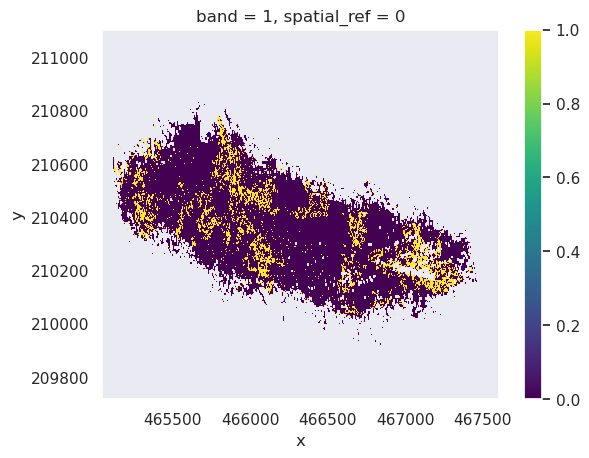

In [30]:
ds.canopychange_binary.plot(cbar_kwargs={'label':''})

## Aspect

Okay, now go back and look at what Jessica said for calculations.\
We want to break each canopy change and no canopy change up into north and south aspects

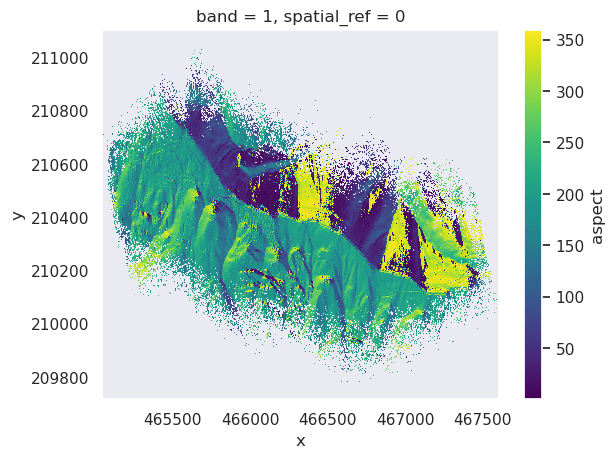

In [31]:
ds['aspect'].plot()

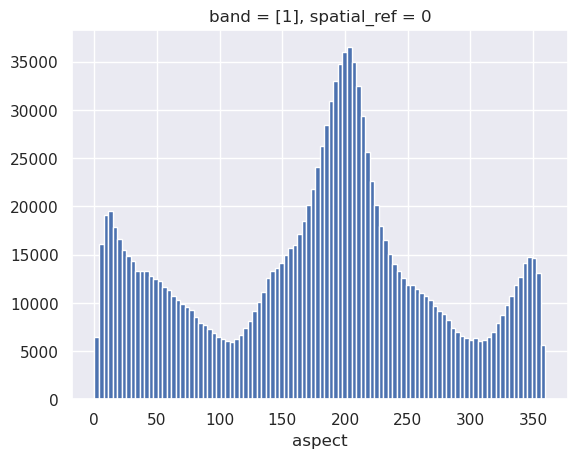

In [32]:
ds['aspect'].plot.hist(bins=100)
plt.show()

**We want to classify north vs south regions.**\
There are a few ways to do this, and it does depend on the terrain.\
Since, 0 is north, 90 is east, 180 is south and 270 is west. We could, 
1. say north is 300-120, and south is 120-300 
2. or compute actual minimum values in the histogram (then it may not be an even split)
3.  or pick the slopes +/- 45 degrees of the peaks in the histogram, thus 
    * 200 degrees +/-45 is south
    * 10 degrees +/-45 is north

**Option 1**

In [33]:
# The way I was doing it before, but let's use the histogram to give our better boundaries 
# classify aspect as north and south by 0-360 degrees 
# ds['aspect_north'] = ds['aspect'].where(ds['aspect'] <= 180) # north
# ds['aspect_south'] = ds['aspect'].where(ds['aspect'] > 180) # south

# Option 1, which includes all the data (watch or vs and statements here)
ds['aspect_north1'] = ds['aspect'].where((ds['aspect'] > 300) | (ds['aspect'] < 120)) # greater than 300 or less than 120 north
ds['aspect_south1'] = ds['aspect'].where((ds['aspect'] >= 120) & (ds['aspect'] <= 300)) # between 120 and 300 south

# also, create an aspect binary variable to use later 
ds['aspect_binary1'] =  np.nan
ds['aspect_binary1'] = ds['aspect_binary1'].where(~((ds['aspect'] > 300) | (ds['aspect'] < 120)), 0) # where true, fill with 0
ds['aspect_binary1'] = ds['aspect_binary1'].where(~((ds['aspect'] >= 120) & (ds['aspect'] <= 300)), 1) 

# therefore, south is 0 and north is 1 
ds['aspect_binary1'] = ds['aspect_binary1'].where(ds.diff_chm_rapid_snowoff.notnull()) # now, just make nans where there is no data really


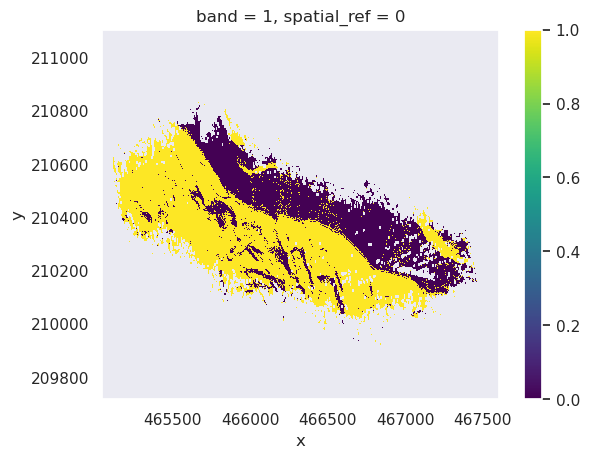

In [34]:
ds.aspect_binary1.plot(cbar_kwargs={'label':''})

In [35]:
# for Option 3 
print('the max north bound is:', 10+45)
print('the min north bound is:', 360+(10-45))
print('')
print('the max south bound is:', 200+45)
print('the min south bound is:', 200-45)

the max north bound is: 55
the min north bound is: 325

the max south bound is: 245
the min south bound is: 155


**Option 3**

In [36]:
# Option 3, which excludes some of the data 
# the numbers above show the calculate bounds for this option
ds['aspect_north2'] = ds['aspect'].where((ds['aspect'] >= 325) | (ds['aspect'] <= 55)) # greater than 300 or less than 120 north
ds['aspect_south2'] = ds['aspect'].where((ds['aspect'] >= 155) & (ds['aspect'] <= 245)) # between 120 and 300 south

# also, create an aspect binary variable to use later 
ds['aspect_binary2'] = np.nan
ds['aspect_binary2'] = ds['aspect_binary2'].where(~((ds['aspect'] >= 325) | (ds['aspect'] <= 55)), 0) # where not false (true) fill 0
ds['aspect_binary2'] = ds['aspect_binary2'].where(~((ds['aspect'] >= 155) & (ds['aspect'] <= 245)), 1) 

# therefore, south is 0 and north is 1 
ds['aspect_binary2'] = ds['aspect_binary2'].where(ds.diff_chm_rapid_snowoff.notnull()) # now, just make nans where there is no data really

The above code was working the entire time,\
the problem was, I was keep aspect in there that was reclassified.\
Instead, I needed to fill with na. so I fixed. :)

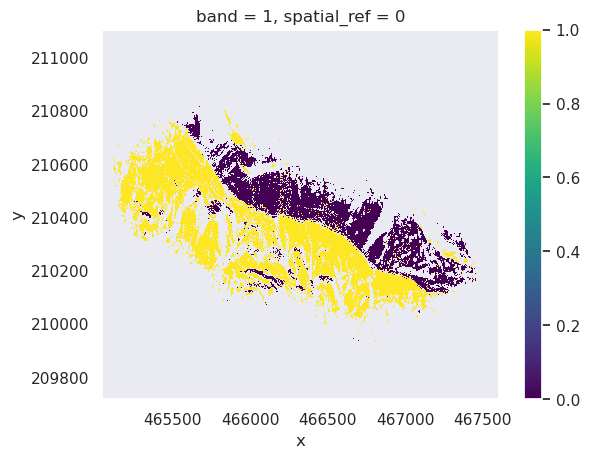

In [37]:
ds.aspect_binary2.plot(cbar_kwargs={'label':''})

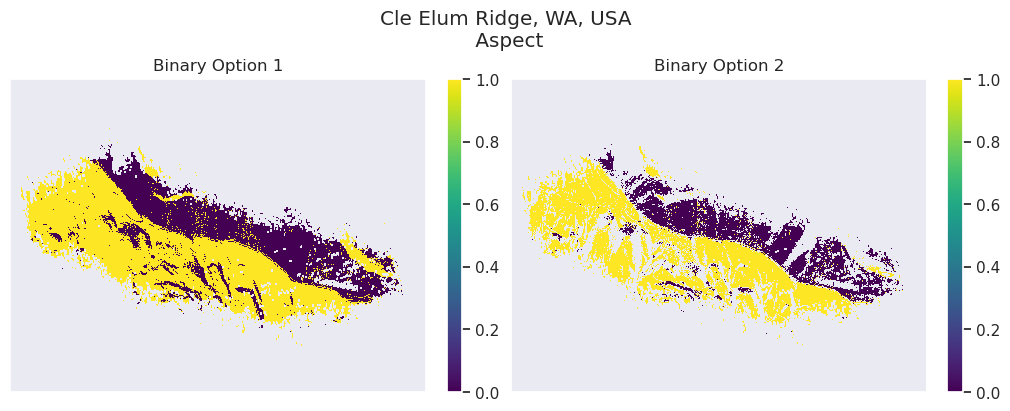

In [38]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Aspect')

ds['aspect_binary1'].plot(ax=axes[0], vmin=0, vmax=1, cbar_kwargs={'label':''}) 
ds['aspect_binary2'].plot(ax=axes[1], vmin=0, vmax=1, cbar_kwargs={'label':''})  

axes[0].set_title('Binary Option 1')
axes[1].set_title('Binary Option 2')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()

Okay, and now, we want to fine where the forest changed or did not, on each aspect 

In [39]:
# aspect defintion option 1
ds['canopychange_north1'] = ds['canopychange'].where(ds['aspect_north1'] >= 0) # north
ds['canopychange_south1'] = ds['canopychange'].where(ds['aspect_south1'] >= 0) # south

ds['nocanopychange_north1'] = ds['nocanopychange'].where(ds['aspect_north1'] >= 0) # north
ds['nocanopychange_south1'] = ds['nocanopychange'].where(ds['aspect_south1'] >= 0) # south

# option 2
ds['canopychange_north2'] = ds['canopychange'].where(ds['aspect_north2'] >= 0) # north
ds['canopychange_south2'] = ds['canopychange'].where(ds['aspect_south2'] >= 0) # south

ds['nocanopychange_north2'] = ds['nocanopychange'].where(ds['aspect_north2'] >= 0) # north
ds['nocanopychange_south2'] = ds['nocanopychange'].where(ds['aspect_south2'] >= 0) # south

Instead, plot the canopy change binary on north and south

In [40]:
ds['canopychange_binary_north1'] = ds['canopychange_binary'].where(ds['aspect_north1'] >= 0) # north
ds['canopychange_binary_south1'] = ds['canopychange_binary'].where(ds['aspect_south1'] >= 0) # south

ds['canopychange_binary_north2'] = ds['canopychange_binary'].where(ds['aspect_north2'] >= 0) # north
ds['canopychange_binary_south2'] = ds['canopychange_binary'].where(ds['aspect_south2'] >= 0) # south

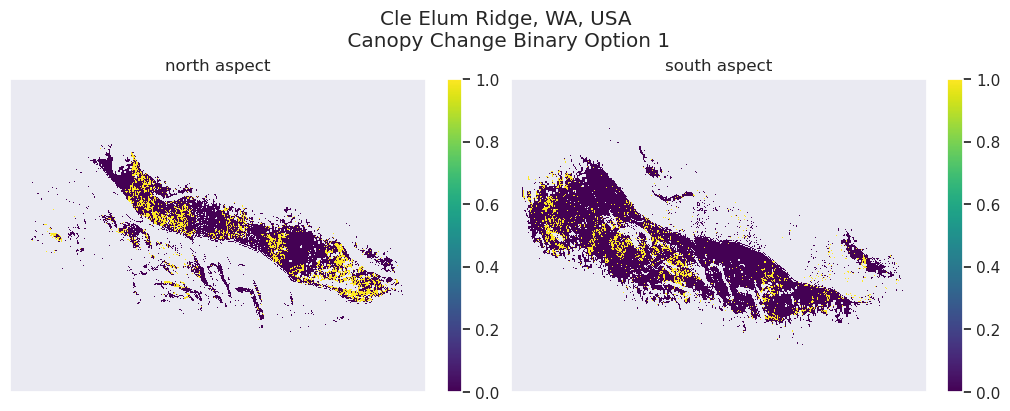

In [41]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Canopy Change Binary Option 1')

ds['canopychange_binary_north1'].plot(ax=axes[0], cbar_kwargs={'label':''}) 
ds['canopychange_binary_south1'].plot(ax=axes[1], cbar_kwargs={'label':''})  

axes[0].set_title('north aspect')
axes[1].set_title('south aspect')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()

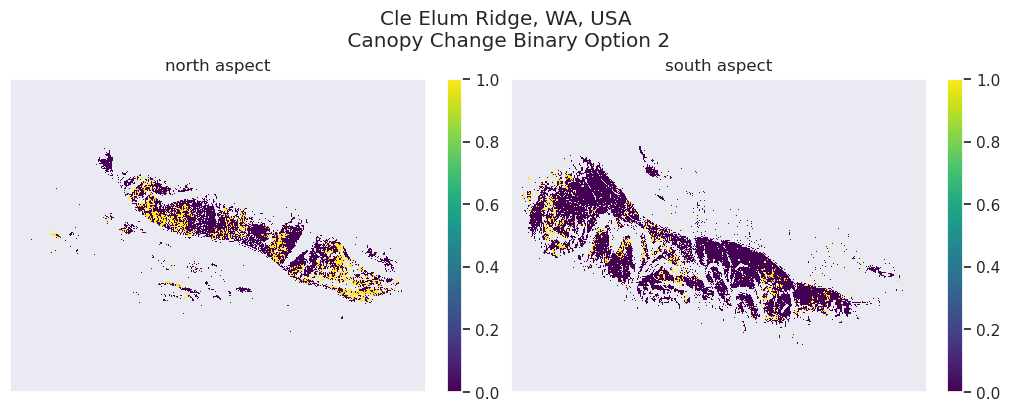

In [42]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Canopy Change Binary Option 2')

ds['canopychange_binary_north2'].plot(ax=axes[0], cbar_kwargs={'label':''}) 
ds['canopychange_binary_south2'].plot(ax=axes[1], cbar_kwargs={'label':''})  

axes[0].set_title('north aspect')
axes[1].set_title('south aspect')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()

Okay, now we have four groups
* canopy changed on north 
* canopy changed on south 
* no change on north 
* no change on south 

And, we want to calculate snow depth in each

Binary is 1 == change, 0 == no change

In [43]:
# save snow depth as a new variable where there is canopy change on the north 
ds['hs_canopychange_north1'] = ds['hs_rapid'].where(ds['canopychange_binary_north1'] == 1) # north change 
ds['hs_canopychange_south1'] = ds['hs_rapid'].where(ds['canopychange_binary_south1'] == 1) # south change

ds['hs_nocanopychange_north1'] = ds['hs_rapid'].where(ds['canopychange_binary_north1'] == 0) # north no change
ds['hs_nocanopychange_south1'] = ds['hs_rapid'].where(ds['canopychange_binary_south1'] == 0) # south no change


ds['hs_canopychange_north2'] = ds['hs_rapid'].where(ds['canopychange_binary_north2'] == 1) # north change 
ds['hs_canopychange_south2'] = ds['hs_rapid'].where(ds['canopychange_binary_south2'] == 1) # south change

ds['hs_nocanopychange_north2'] = ds['hs_rapid'].where(ds['canopychange_binary_north2'] == 0) # north no change
ds['hs_nocanopychange_south2'] = ds['hs_rapid'].where(ds['canopychange_binary_south2'] == 0) # south no change

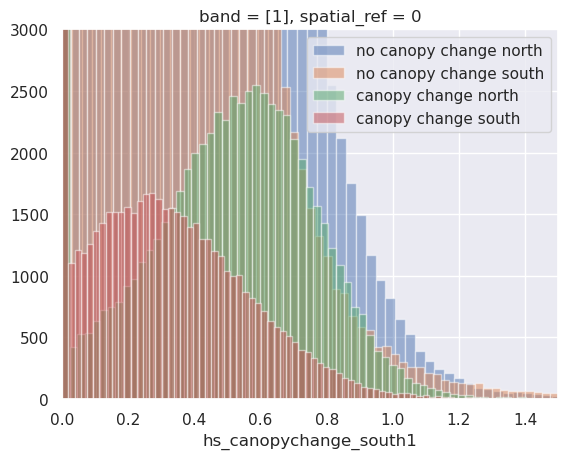

In [44]:
# plot histograms of the four groups 
alpha = .5
ds['hs_nocanopychange_north1'].plot.hist(bins=100, label='no canopy change north', alpha=alpha)
ds['hs_nocanopychange_south1'].plot.hist(bins=100, label='no canopy change south', alpha=alpha)
ds['hs_canopychange_north1'].plot.hist(bins=100, label='canopy change north', alpha=alpha)
ds['hs_canopychange_south1'].plot.hist(bins=100, label='canopy change south', alpha=alpha)

plt.xlim(0,1.5)
plt.ylim(0,3000)
plt.legend()
plt.show()

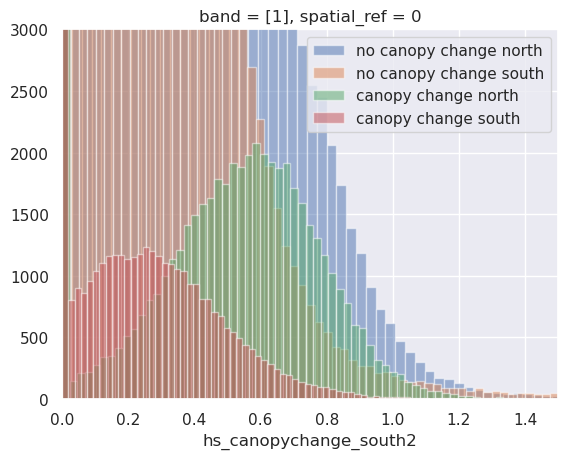

In [45]:
# plot histograms of the four groups 
alpha = .5

ds['hs_nocanopychange_north2'].plot.hist(bins=100, label='no canopy change north', alpha=alpha)
ds['hs_nocanopychange_south2'].plot.hist(bins=100, label='no canopy change south', alpha=alpha)
ds['hs_canopychange_north2'].plot.hist(bins=100, label='canopy change north', alpha=alpha)
ds['hs_canopychange_south2'].plot.hist(bins=100, label='canopy change south', alpha=alpha)

plt.xlim(0,1.5)
plt.ylim(0,3000)
plt.legend()
plt.show()

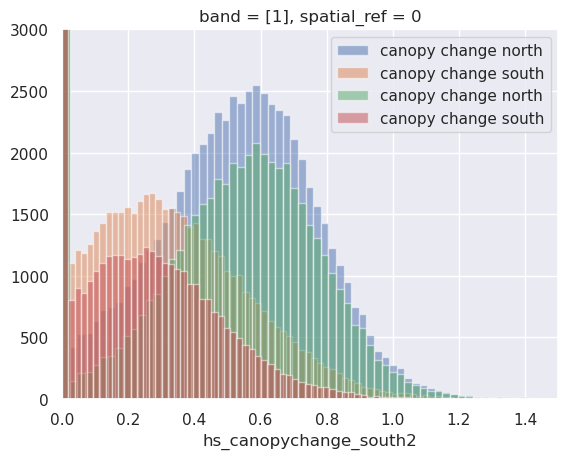

In [46]:
# plot histograms of the four groups 
alpha = .5
# ds['hs_nocanopychange_north1'].plot.hist(bins=100, label='no canopy change north', alpha=alpha)
# ds['hs_nocanopychange_south1'].plot.hist(bins=100, label='no canopy change south', alpha=alpha)
ds['hs_canopychange_north1'].plot.hist(bins=100, label='canopy change north', alpha=alpha)
ds['hs_canopychange_south1'].plot.hist(bins=100, label='canopy change south', alpha=alpha)

# ds['hs_nocanopychange_north2'].plot.hist(bins=100, label='no canopy change north', alpha=alpha)
# ds['hs_nocanopychange_south2'].plot.hist(bins=100, label='no canopy change south', alpha=alpha)
ds['hs_canopychange_north2'].plot.hist(bins=100, label='canopy change north', alpha=alpha)
ds['hs_canopychange_south2'].plot.hist(bins=100, label='canopy change south', alpha=alpha)

plt.xlim(0,1.5)
plt.ylim(0,3000)
plt.legend()
plt.show()

It looks like the Option 2 for classifying north and south is more true and still provides plenty of data.\
We will proceed with option 2. 

## Add BAF

Define canopy change as the BAF regions or not for change 

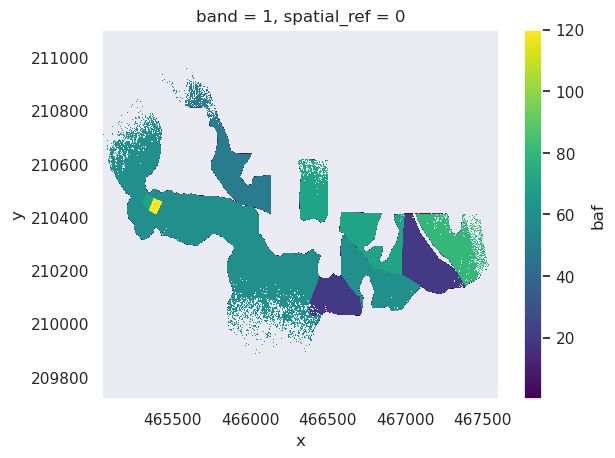

In [47]:
ds.baf.plot()

In [48]:
ds['baf_canopychange_binary'] = np.nan 
ds['baf_canopychange_binary'] = ds['baf_canopychange_binary'].fillna(0) # then fill the nans with 0
ds['baf_canopychange_binary'] = ds['baf_canopychange_binary'].where(~(ds['baf'] > 0), 1) # any BAF means canopy change
ds['baf_canopychange_binary'] = ds['baf_canopychange_binary'].where(ds.diff_chm_rapid_snowoff.notnull()) # now, just make nans where there is no data really

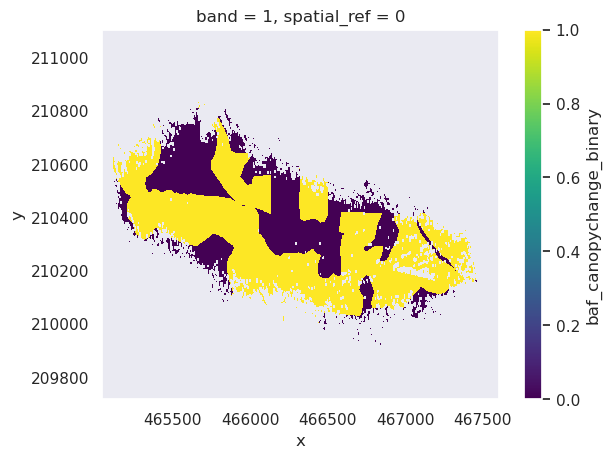

In [49]:
ds['baf_canopychange_binary'].plot()

Plot the two canopy change features next to eachother

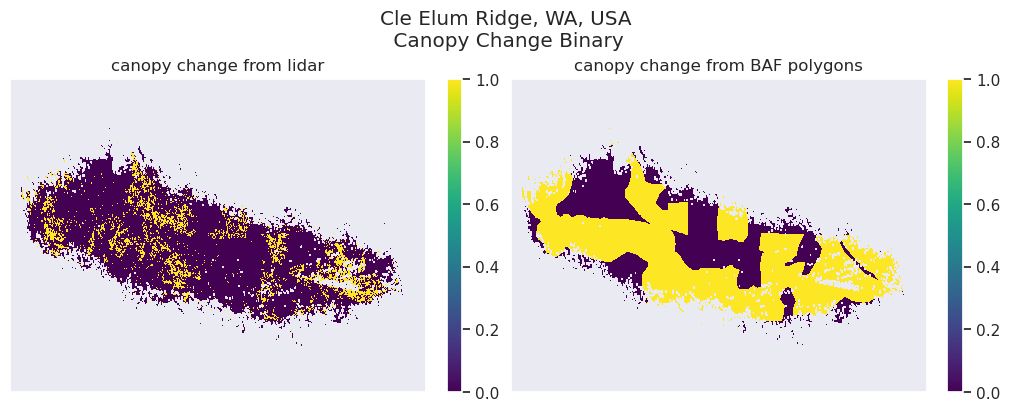

In [50]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Canopy Change Binary')

ds['canopychange_binary'].plot(ax=axes[0], cbar_kwargs={'label':''}) 
ds['baf_canopychange_binary'].plot(ax=axes[1], cbar_kwargs={'label':''})  

axes[0].set_title('canopy change from lidar')
axes[1].set_title('canopy change from BAF polygons')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()

## Create Tidy df to work with

In [93]:
# Lets make a tidy dataframe with snow depth as the main variables, then attributes in the other columns like canopy change, aspect, etc.
dftidy = pd.DataFrame({'hs_rapid':ds['hs_rapid'].values.flatten(),
                       'dce_rapid':ds['dce_rapid'].values.flatten(),
                       'giulia_dce_rapid':ds['giulia_dce_rapid'].values.flatten(),
                       'hs_ncalm':ds['hs_ncalm'].values.flatten(),
                       'dce_ncalm':ds['dce_ncalm'].values.flatten(),
                       'dah': ds['dah'].values.flatten(),
                       'baf': ds['baf'].values.flatten(),
                       'aspect': ds['aspect'].values.flatten(),
                       'aspect_binary1': ds['aspect_binary1'].values.flatten(),
                       'aspect_binary2': ds['aspect_binary2'].values.flatten(),
                       'lidar_canopychange_binary': ds['canopychange_binary'].values.flatten(),
                       'baf_canopychange_binary': ds['baf_canopychange_binary'].values.flatten()})

Create binary groups for easy plotting in box plots

In [94]:
# create a binary aspect for north and south
# first, create empty columns for aspect and canopy change with nan 
dftidy['aspect1'] = np.nan
dftidy['aspect2'] = np.nan
dftidy['lidar_canopychange'] = np.nan
dftidy['baf_canopychange'] = np.nan
dftidy['baf_words'] = np.nan
dftidy['dah_words'] = np.nan

# dah
dftidy['dah_words'] = dftidy['dah_words'].mask(dftidy['dah'] >= 0, 'high heat index')
dftidy['dah_words'] = dftidy['dah_words'].mask(dftidy['dah'] <  0 , 'low heat index')

# binary 0 is south, 1 is north
dftidy['aspect1'] = dftidy['aspect1'].mask(dftidy['aspect_binary1'] == 0, 'north') # mask (replace) where true 
dftidy['aspect1'] = dftidy['aspect1'].mask(dftidy['aspect_binary1'] == 1, 'south') # mask where true 

# binary 0 is south, 1 is north
dftidy['aspect2'] = dftidy['aspect2'].mask(dftidy['aspect_binary2'] == 0, 'north') # mask (replace) where true 
dftidy['aspect2'] = dftidy['aspect2'].mask(dftidy['aspect_binary2'] == 1, 'south') # mask where true 

# create a binary canopy change for change and no change
# 0 is no change, 1 is change in canopy structure 
dftidy['lidar_canopychange'] = dftidy['lidar_canopychange'].mask(dftidy['lidar_canopychange_binary'] == 0, 'no change') # mask where true 
dftidy['lidar_canopychange'] = dftidy['lidar_canopychange'].mask(dftidy['lidar_canopychange_binary'] == 1, 'change')    # mask where true 

dftidy['baf_canopychange'] = dftidy['baf_canopychange'].mask(dftidy['baf_canopychange_binary'] == 0, 'no change') # mask where true 
dftidy['baf_canopychange'] = dftidy['baf_canopychange'].mask(dftidy['baf_canopychange_binary'] == 1, 'change')    # mask where true 

# create a baf option for plotting 
dftidy['baf_words'] = dftidy['baf_words'].mask(dftidy['baf'] == 20, '20 BAF') # mask where true 
dftidy['baf_words'] = dftidy['baf_words'].mask(dftidy['baf'] == 50, '50 BAF') 
dftidy['baf_words'] = dftidy['baf_words'].mask(dftidy['baf'] == 60, '60 BAF') 
dftidy['baf_words'] = dftidy['baf_words'].mask(dftidy['baf'] == 70, '70 BAF') 
dftidy['baf_words'] = dftidy['baf_words'].mask(dftidy['baf'] == 80, '80 BAF') 
dftidy['baf_words'] = dftidy['baf_words'].mask(dftidy['baf'] == 120,'120 BAF') 

dftidy.head()

hs_rapid  dce_rapid  giulia_dce_rapid  hs_ncalm  dce_ncalm  dah  baf   
0       0.0        NaN               NaN       0.0        NaN  NaN  NaN  \
1       0.0        NaN               NaN       0.0        NaN  NaN  NaN   
2       0.0        NaN               NaN       0.0        NaN  NaN  NaN   
3       0.0        NaN               NaN       0.0        NaN  NaN  NaN   
4       0.0        NaN               NaN       0.0        NaN  NaN  NaN   

   aspect  aspect_binary1  aspect_binary2  lidar_canopychange_binary   
0     NaN             NaN             NaN                        NaN  \
1     NaN             NaN             NaN                        NaN   
2     NaN             NaN             NaN                        NaN   
3     NaN             NaN             NaN                        NaN   
4     NaN             NaN             NaN                        NaN   

   baf_canopychange_binary aspect1 aspect2 lidar_canopychange   
0                      NaN     NaN     NaN                NaN  \
1                      NaN     NaN     NaN                NaN   
2                      NaN     NaN     NaN                NaN   
3                      NaN     NaN     NaN                NaN   
4                      NaN     NaN     NaN                NaN   

  baf_canopychange baf_words dah_words  
0              NaN       NaN       NaN  
1              NaN       NaN       NaN  
2              NaN       NaN       NaN  
3              NaN       NaN       NaN  
4              NaN       NaN       NaN

<Axes: xlabel='aspect1', ylabel='hs_rapid'>

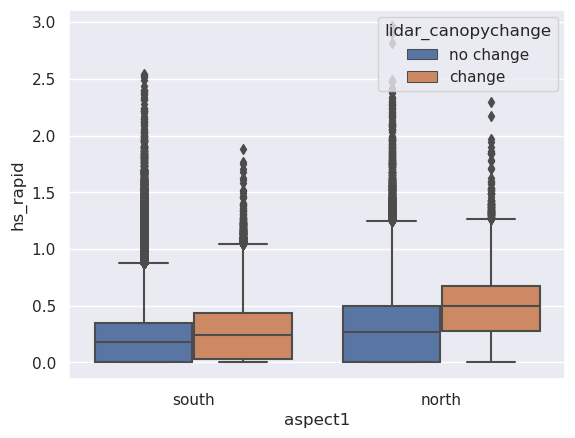

In [74]:
sns.boxplot(dftidy, x='aspect1', y='hs_rapid', hue='lidar_canopychange', order=['south', 'north'])

<Axes: xlabel='aspect2', ylabel='hs_rapid'>

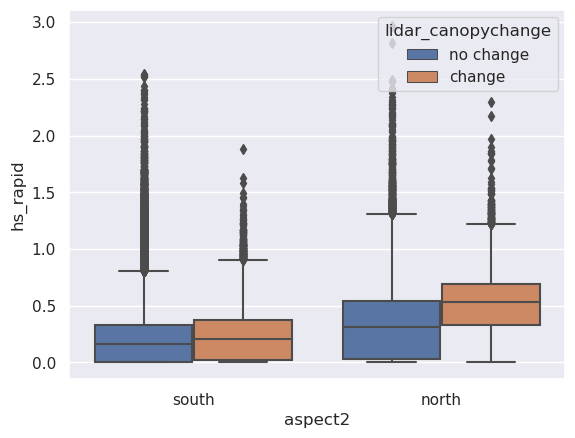

In [75]:
sns.boxplot(dftidy, x='aspect2', y='hs_rapid', hue='lidar_canopychange', order=['south', 'north'])

Try plotting it the other way, 

<Axes: xlabel='lidar_canopychange', ylabel='hs_rapid'>

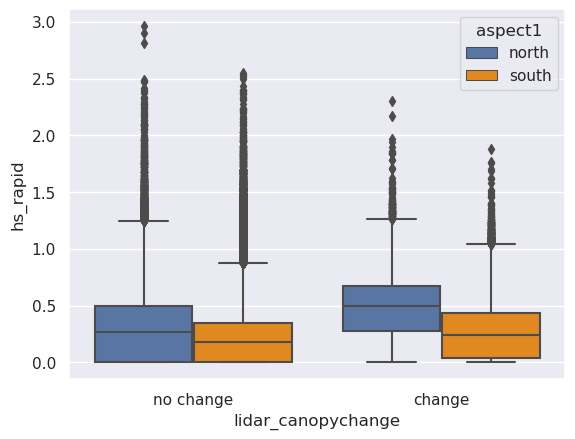

In [78]:
my_pal = {"north": "b", "south": "darkorange"}
sns.boxplot(dftidy, x='lidar_canopychange', y='hs_rapid', hue='aspect1', palette=my_pal,  order=['no change', 'change'])

And, using the aspect option 2

<Axes: xlabel='lidar_canopychange', ylabel='hs_rapid'>

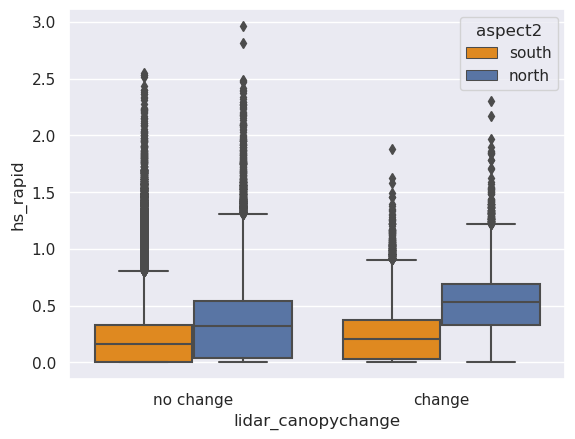

In [76]:
my_pal = {"north": "b", "south": "darkorange"}
sns.boxplot(dftidy, x='lidar_canopychange', y='hs_rapid', hue='aspect2', palette=my_pal, order=['no change', 'change'])

Or, compare with dah instead

<Axes: xlabel='lidar_canopychange', ylabel='hs_rapid'>

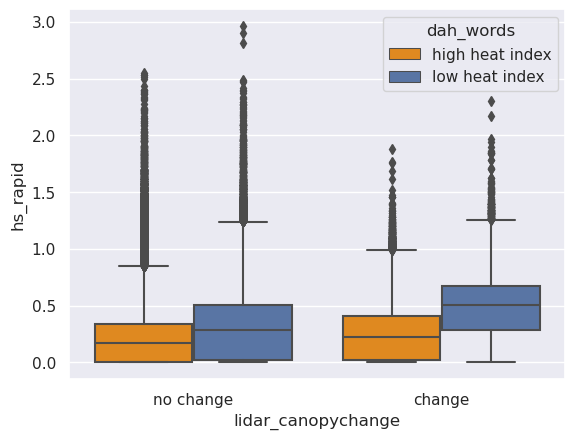

In [85]:
my_pal = {"low heat index": "b", "high heat index": "darkorange"}
sns.boxplot(dftidy, x='lidar_canopychange', y='hs_rapid', hue='dah_words', palette=my_pal)

Now, compare with the baf canopy change

<Axes: xlabel='baf_canopychange', ylabel='hs_rapid'>

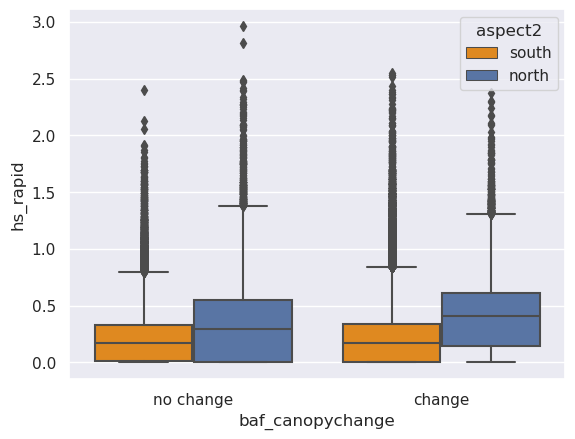

In [67]:
my_pal = {"north": "b", "south": "darkorange"}
sns.boxplot(dftidy, x='baf_canopychange', y='hs_rapid', hue='aspect2', palette=my_pal, order=['no change', 'change'])

Trying just to plot baf

Text(0.5, 0, 'BAF from WADNR polygons')

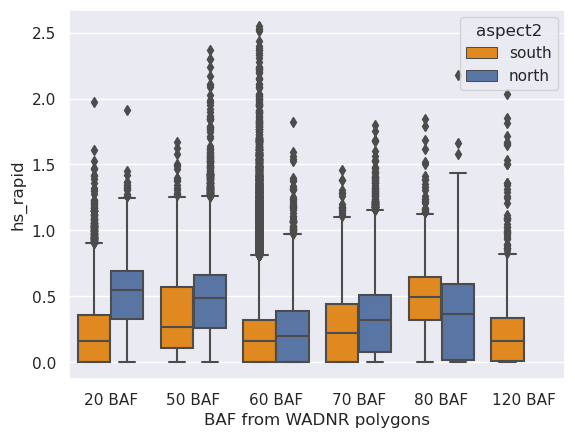

In [68]:
my_pal = {"north": "b", "south": "darkorange"}
sns.boxplot(dftidy, x='baf_words', y='hs_rapid', hue='aspect2', palette=my_pal, order=['20 BAF', '50 BAF', '60 BAF', '70 BAF', '80 BAF', '120 BAF'])
plt.xlabel('BAF from WADNR polygons')

Text(0.5, 0, 'BAF from WADNR polygons')

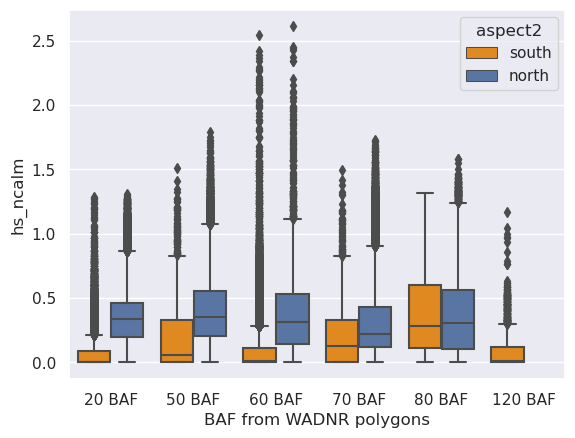

In [69]:
my_pal = {"north": "b", "south": "darkorange"}
sns.boxplot(dftidy, x='baf_words', y='hs_ncalm', hue='aspect2', palette=my_pal, order=['20 BAF', '50 BAF', '60 BAF', '70 BAF', '80 BAF', '120 BAF'])
plt.xlabel('BAF from WADNR polygons')

Other plots

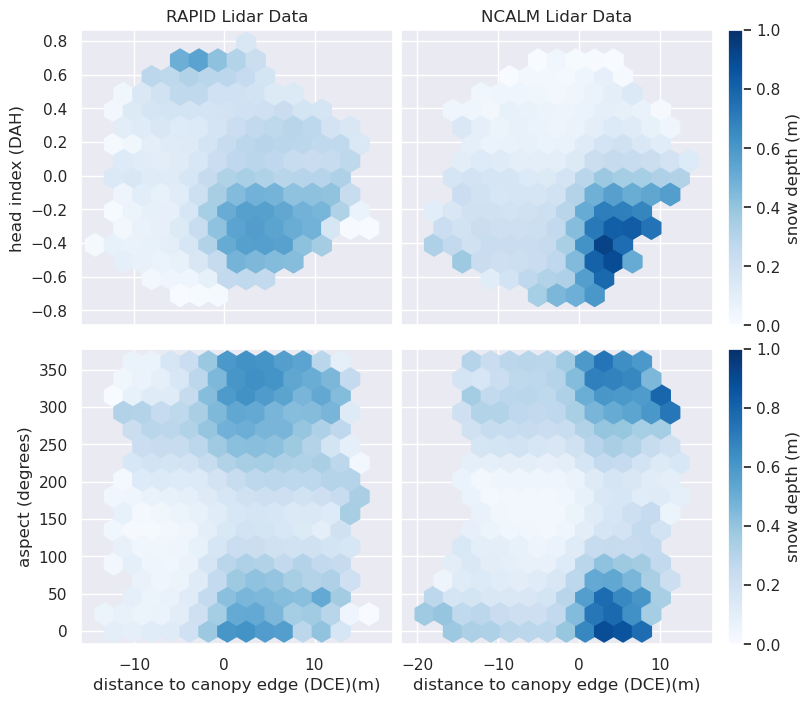

In [108]:
fig, axes = plt.subplots(2,2, figsize=(8,7), constrained_layout = True, sharex='col', sharey='row')
fig.suptitle('')

mincount = 10
gridsize = 15

# plots 
p1 = axes[0,0].hexbin(dftidy.dce_rapid, dftidy.dah, dftidy.hs_rapid, cmap='Blues', vmin=0, vmax=1, mincnt=mincount, gridsize=gridsize)
p2 = axes[0,1].hexbin(dftidy.dce_ncalm, dftidy.dah, dftidy.hs_ncalm, cmap='Blues',  vmin=0, vmax=1, mincnt=mincount, gridsize=gridsize)

p3 = axes[1,0].hexbin(dftidy.dce_rapid, dftidy.aspect, dftidy.hs_rapid, cmap='Blues', vmin=0, vmax=1, mincnt=mincount, gridsize=gridsize)
p4 = axes[1,1].hexbin(dftidy.dce_ncalm, dftidy.aspect, dftidy.hs_ncalm, cmap='Blues',  vmin=0, vmax=1, mincnt=mincount, gridsize=gridsize)

# labels 
axes[0,0].set_title('RAPID Lidar Data')
axes[0,1].set_title('NCALM Lidar Data')

axes[0,0].set_ylabel('head index (DAH)')
axes[1,0].set_ylabel('aspect (degrees)')
axes[1,0].set_xlabel('distance to canopy edge (DCE)(m)')
axes[1,1].set_xlabel('distance to canopy edge (DCE)(m)')

#colorbar
cb1 = fig.colorbar(p2, ax=axes[0,1])
cb2 = fig.colorbar(p4, ax=axes[1,1])

cb1.set_label('snow depth (m)')
cb2.set_label('snow depth (m)')

# # shared axes have same limits
# axes[0,0].set_ylim([-25,35]) # row 1 tpi y lim
# axes[1,0].set_ylim([-1,1])   # row 2 dah y lim

# axes[1,0].set_xlim([-20,40]) # col 1 dce x lim
# axes[1,1].set_xlim([-20,40]) # col 2 dce x lim
# axes[1,2].set_xlim([-20,40]) # col 3 dce x lim

Compare the two different DCE's

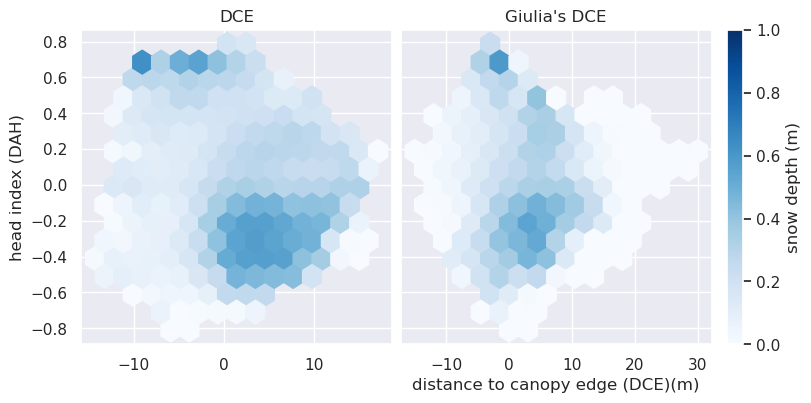

In [114]:
fig, axes = plt.subplots(1,2, figsize=(8,4), constrained_layout = True, sharex='col', sharey='row')
fig.suptitle('')

mincount = 1
gridsize = 15

# plots 
p1 = axes[0].hexbin(dftidy.dce_rapid, dftidy.dah, dftidy.hs_rapid, cmap='Blues', vmin=0, vmax=1, mincnt=mincount, gridsize=gridsize)
p2 = axes[1].hexbin(dftidy.giulia_dce_rapid, dftidy.dah, dftidy.hs_rapid, cmap='Blues', vmin=0, vmax=1, mincnt=mincount, gridsize=gridsize)

# labels 
axes[0].set_title('DCE')
axes[1].set_title('Giulia\'s DCE')

axes[0].set_ylabel('head index (DAH)')
axes[1].set_xlabel('distance to canopy edge (DCE)(m)')

# #colorbar
# cb1 = fig.colorbar(p2, ax=axes[0])
cb2 = fig.colorbar(p2, ax=axes[1])

# cb1.set_label('snow depth (m)')
cb2.set_label('snow depth (m)')

# # shared axes have same limits
# axes[0,0].set_ylim([-25,35]) # row 1 tpi y lim
# axes[1,0].set_ylim([-1,1])   # row 2 dah y lim

# axes[1,0].set_xlim([-20,40]) # col 1 dce x lim
# axes[1,1].set_xlim([-20,40]) # col 2 dce x lim
# axes[1,2].set_xlim([-20,40]) # col 3 dce x lim

## Compare the DCEs
compare both dce, mine and Giulia's

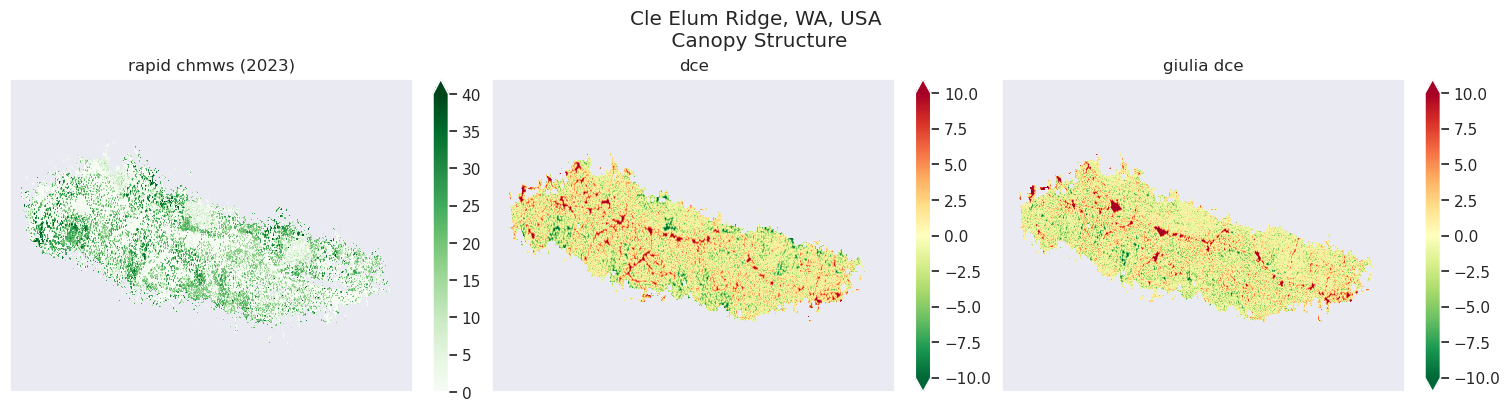

In [59]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Canopy Structure')

ds.chmws_rapid.plot(ax=axes[0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
ds.dce_rapid.plot(ax=axes[1], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.giulia_dce_rapid.plot(ax=axes[2], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})

axes[0].set_title('rapid chmws (2023)')
axes[1].set_title('dce')
axes[2].set_title('giulia dce')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

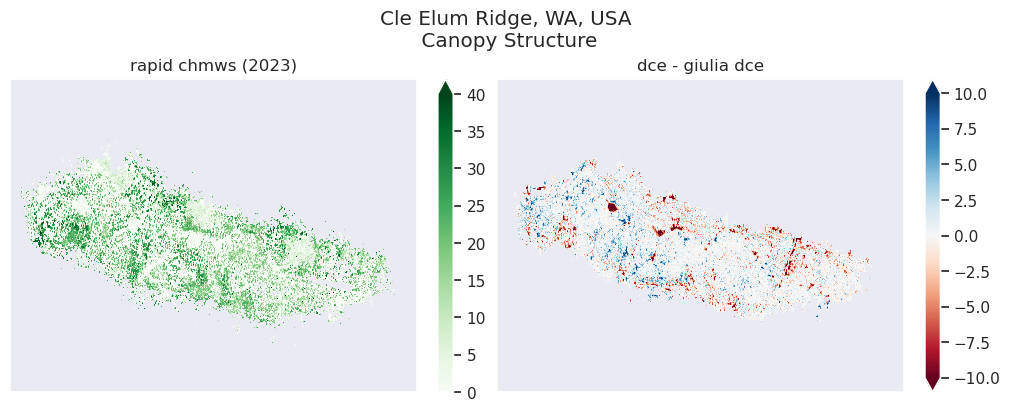

In [60]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n Canopy Structure')

ds.chmws_rapid.plot(ax=axes[0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
(ds.dce_rapid - ds.giulia_dce_rapid).plot(ax=axes[1], cmap='RdBu', vmin=-10, vmax=10, cbar_kwargs={'label':''})

axes[0].set_title('rapid chmws (2023)')
axes[1].set_title('dce - giulia dce')

# fix a few things on the figure 
axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.show()